<a href="https://colab.research.google.com/github/santiagoahl/country-categorization/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[Libraries](#folderId=1lMFiQnwBW_g64gsEoMbJ25LpW4D1YIcv&updateTitle=true&scrollTo=cm9A5KPHy6-M)

>[Data Preprocessing](#folderId=1lMFiQnwBW_g64gsEoMbJ25LpW4D1YIcv&updateTitle=true&scrollTo=skRQDq2oGDtB)

>>[Null data handling](#folderId=1lMFiQnwBW_g64gsEoMbJ25LpW4D1YIcv&updateTitle=true&scrollTo=26C8INGgGZr6)

>>[Duplicates handling](#folderId=1lMFiQnwBW_g64gsEoMbJ25LpW4D1YIcv&updateTitle=true&scrollTo=1-orvNyuGexA)

>>[Distribution analysis](#folderId=1lMFiQnwBW_g64gsEoMbJ25LpW4D1YIcv&updateTitle=true&scrollTo=Cx1ADsqfGmzC)

>>[Data Normalization](#folderId=1lMFiQnwBW_g64gsEoMbJ25LpW4D1YIcv&updateTitle=true&scrollTo=znCWw0nyzDfZ)

>>[Dimensionality Reduction: PCA](#folderId=1lMFiQnwBW_g64gsEoMbJ25LpW4D1YIcv&updateTitle=true&scrollTo=BvPET5s90Vkq)

>[Training](#folderId=1lMFiQnwBW_g64gsEoMbJ25LpW4D1YIcv&updateTitle=true&scrollTo=hjssW3itMomS)

>>[K Means](#folderId=1lMFiQnwBW_g64gsEoMbJ25LpW4D1YIcv&updateTitle=true&scrollTo=qoqxqVvbMrVa)

>>>[With PCA](#folderId=1lMFiQnwBW_g64gsEoMbJ25LpW4D1YIcv&updateTitle=true&scrollTo=o_lVCHeTNM5p)

>>>[Without PCA](#folderId=1lMFiQnwBW_g64gsEoMbJ25LpW4D1YIcv&updateTitle=true&scrollTo=oyxPN2xNNOj-)

>>[Hierarchical Clustering](#folderId=1lMFiQnwBW_g64gsEoMbJ25LpW4D1YIcv&updateTitle=true&scrollTo=zOGZRJgcMsNX)

>>>[With PCA](#folderId=1lMFiQnwBW_g64gsEoMbJ25LpW4D1YIcv&updateTitle=true&scrollTo=bOCxYp7qXqKk)

>>>[Without PCA](#folderId=1lMFiQnwBW_g64gsEoMbJ25LpW4D1YIcv&updateTitle=true&scrollTo=u9_8jJkVX2k5)

>>[DBSCAN](#folderId=1lMFiQnwBW_g64gsEoMbJ25LpW4D1YIcv&updateTitle=true&scrollTo=QUjiefI6MvQY)

>>>[With PCA](#folderId=1lMFiQnwBW_g64gsEoMbJ25LpW4D1YIcv&updateTitle=true&scrollTo=84bTLuRaX3sv)

>>>[Without PCA](#folderId=1lMFiQnwBW_g64gsEoMbJ25LpW4D1YIcv&updateTitle=true&scrollTo=SdBv6nSKX3sw)

>[Testing](#folderId=1lMFiQnwBW_g64gsEoMbJ25LpW4D1YIcv&updateTitle=true&scrollTo=1fNz24iQMp91)



# Libraries

In [292]:
import numpy as np
import pandas as pd
from itertools import product

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage

# Data Preprocessing

In [115]:
df = pd.read_csv('/content/drive/MyDrive/cursos_platzi/Machine Learning con python/clustering/country-categorization/data/Country-data.csv')

In [116]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [117]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Null data handling

In [118]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Duplicates handling

In [119]:
df[df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


## Distribution analysis

In [120]:
int_cols = df.select_dtypes(exclude='object').columns
int_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

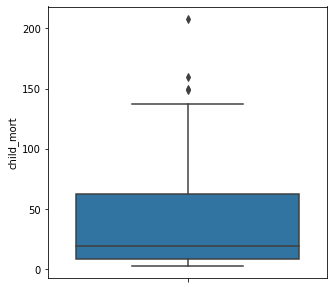

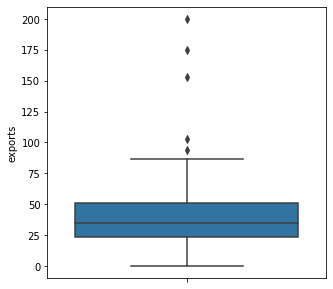

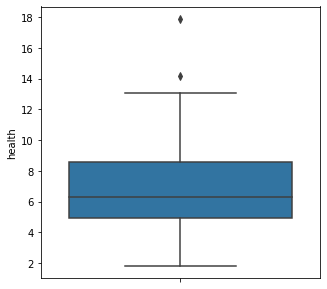

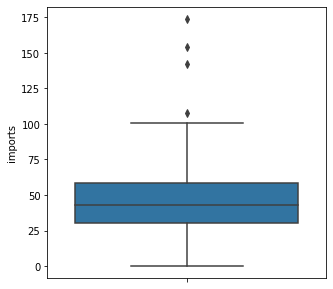

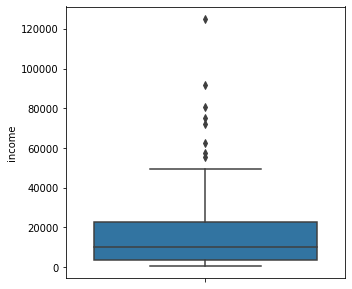

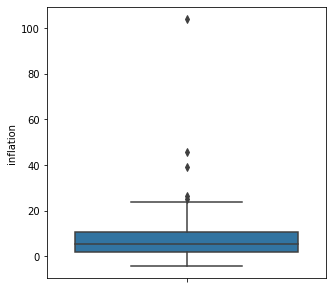

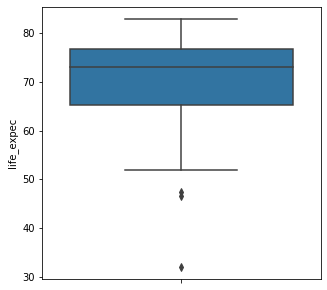

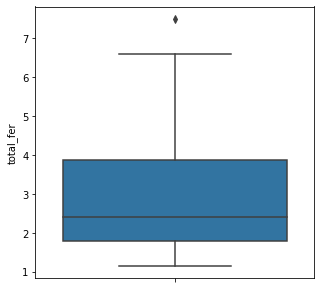

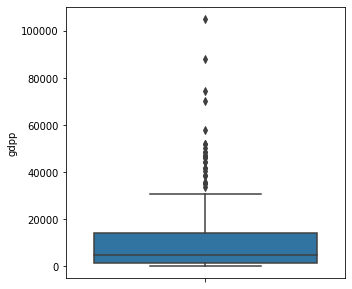

In [121]:
for _ in int_cols:
  plt.figure(figsize=(5, 5))
  sns.boxplot(data=df, y=_)
  plt.show()


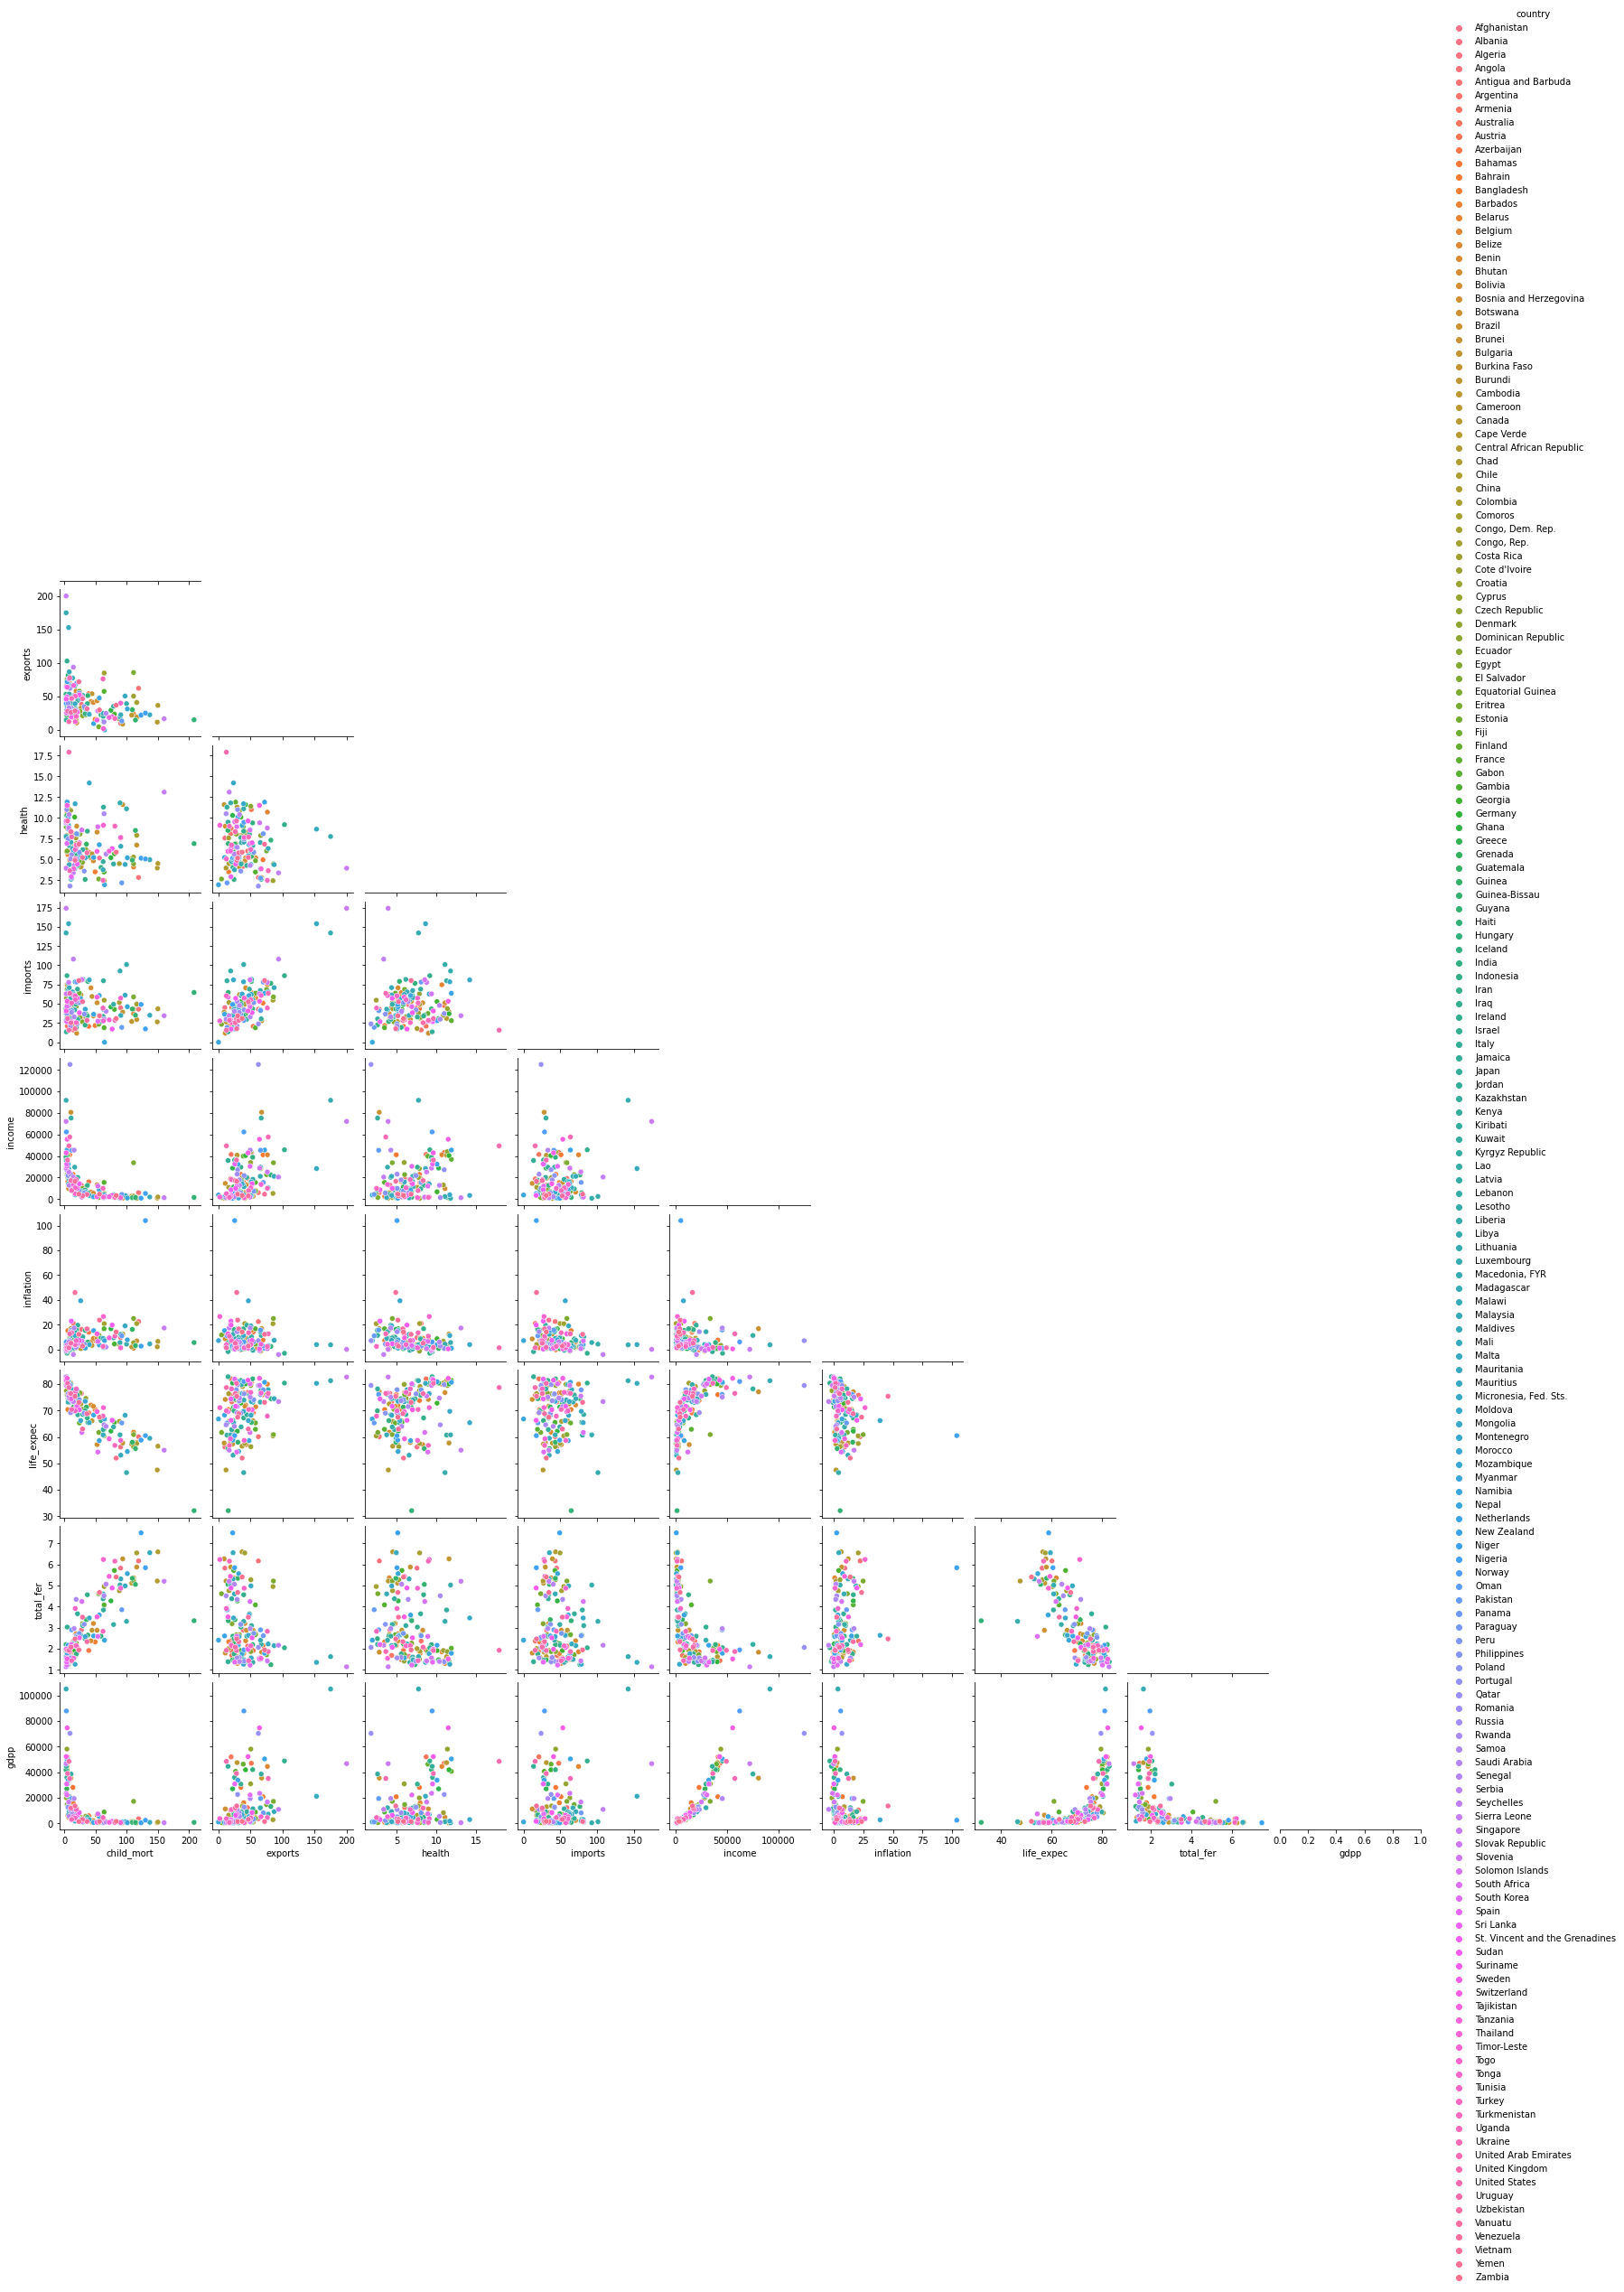

In [122]:
sns.pairplot(data=df, hue='country', corner=True)
plt.show()

We conclude that the inflation score has an outlier, let's find it:

In [123]:
data['inflation']

0       9.44
1       4.49
2      16.10
3      22.40
4       1.44
       ...  
162     2.62
163    45.90
164    12.10
165    23.60
166    14.00
Name: inflation, Length: 167, dtype: float64

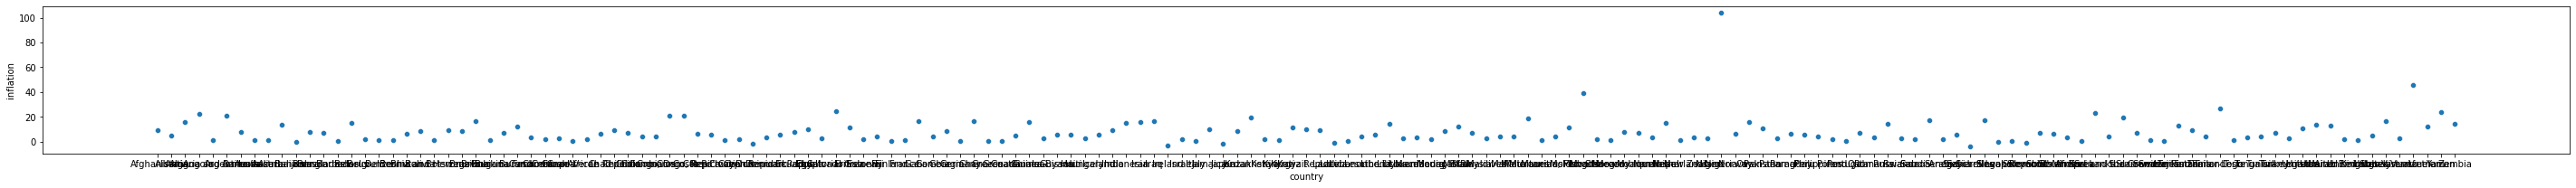

In [124]:
plt.figure(figsize=(50, 3))
sns.scatterplot(data=df, x='country', y='inflation')
plt.show()

In [125]:
np.max(df['inflation'])

104.0

In [126]:
max_inflation_data = df[df['inflation']==np.max(df['inflation'])]
max_inflation_country = max_inflation_data['country']

In [127]:
max_inflation_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330


In [128]:
min_inflation_data = df[df['inflation']==np.min(df['inflation'])]
min_inflation_country = min_inflation_data['country']

In [129]:
max_inflation_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330


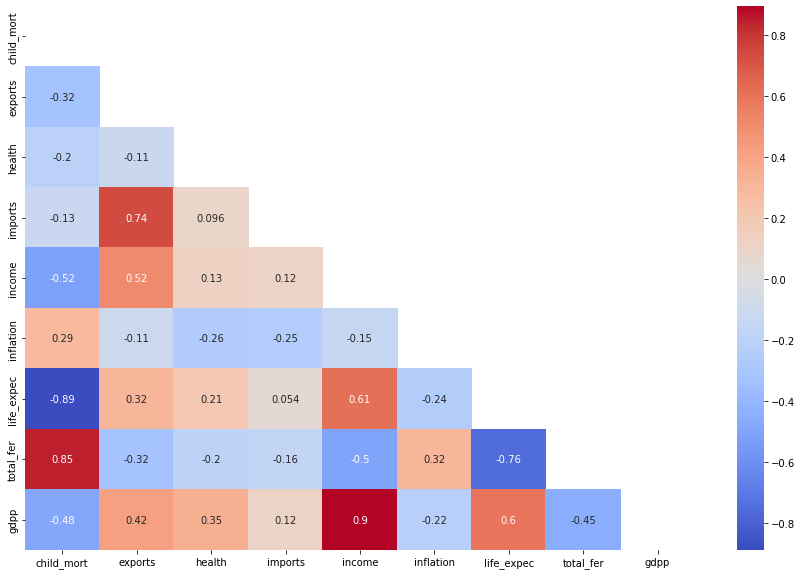

In [130]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', mask=np.triu(df.corr()))
plt.show()

## Data Normalization

In [131]:
sc = StandardScaler()
df_sc = sc.fit_transform(df.drop('country', axis=1))

df_sc = pd.DataFrame(df_sc, columns=df.drop('country', axis=1).columns)

In [132]:
df_sc

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## Dimensionality Reduction: PCA

In [263]:
pca = PCA()
pca_df = pca.fit_transform(df_sc)
pca_df = pd.DataFrame(pca_df)

In [264]:
pca_df

,0,1,2,3,4,5,6,7,8
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000,0.415076,-0.014148
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919,-0.221042,0.173316
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214,-0.184162,0.084037
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835,-0.355998,-0.091339
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978,-0.023681,0.094270
...,...,...,...,...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748,0.009059,-0.098738,0.521886,-0.497803
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581,0.097274,0.206735,-0.078805,-0.275735
164,0.498524,1.390744,-0.238526,-1.074098,1.176081,0.051607,-0.143627,-0.217590,-0.036522
165,-1.887451,-0.109453,1.109752,0.056257,0.618365,-0.540917,0.060256,0.089495,-0.096049


In [220]:
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


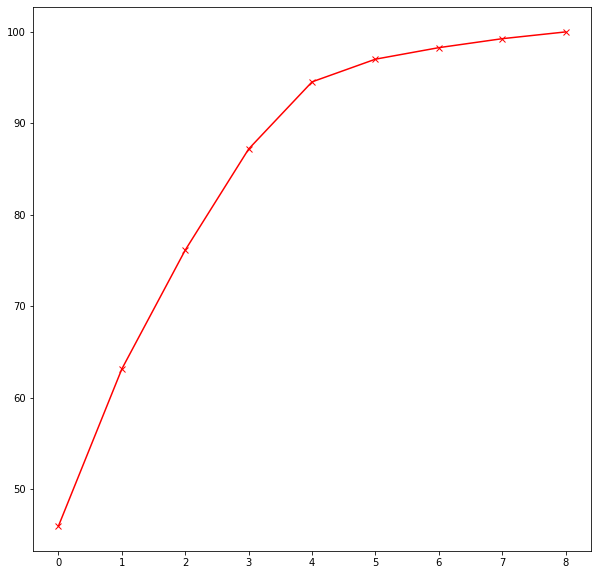

In [223]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(10, 10))
plt.plot(cum_var, 'r-x')
plt.show()

Notice that 4 PCs explain almost the 90% of variance. That's the principal components number chosen.

In [265]:
pca_df.drop([4, 5, 6, 7, 8], axis=1, inplace=True)

In [229]:
pca_df['country'] = df['country']

In [266]:
pca_df

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


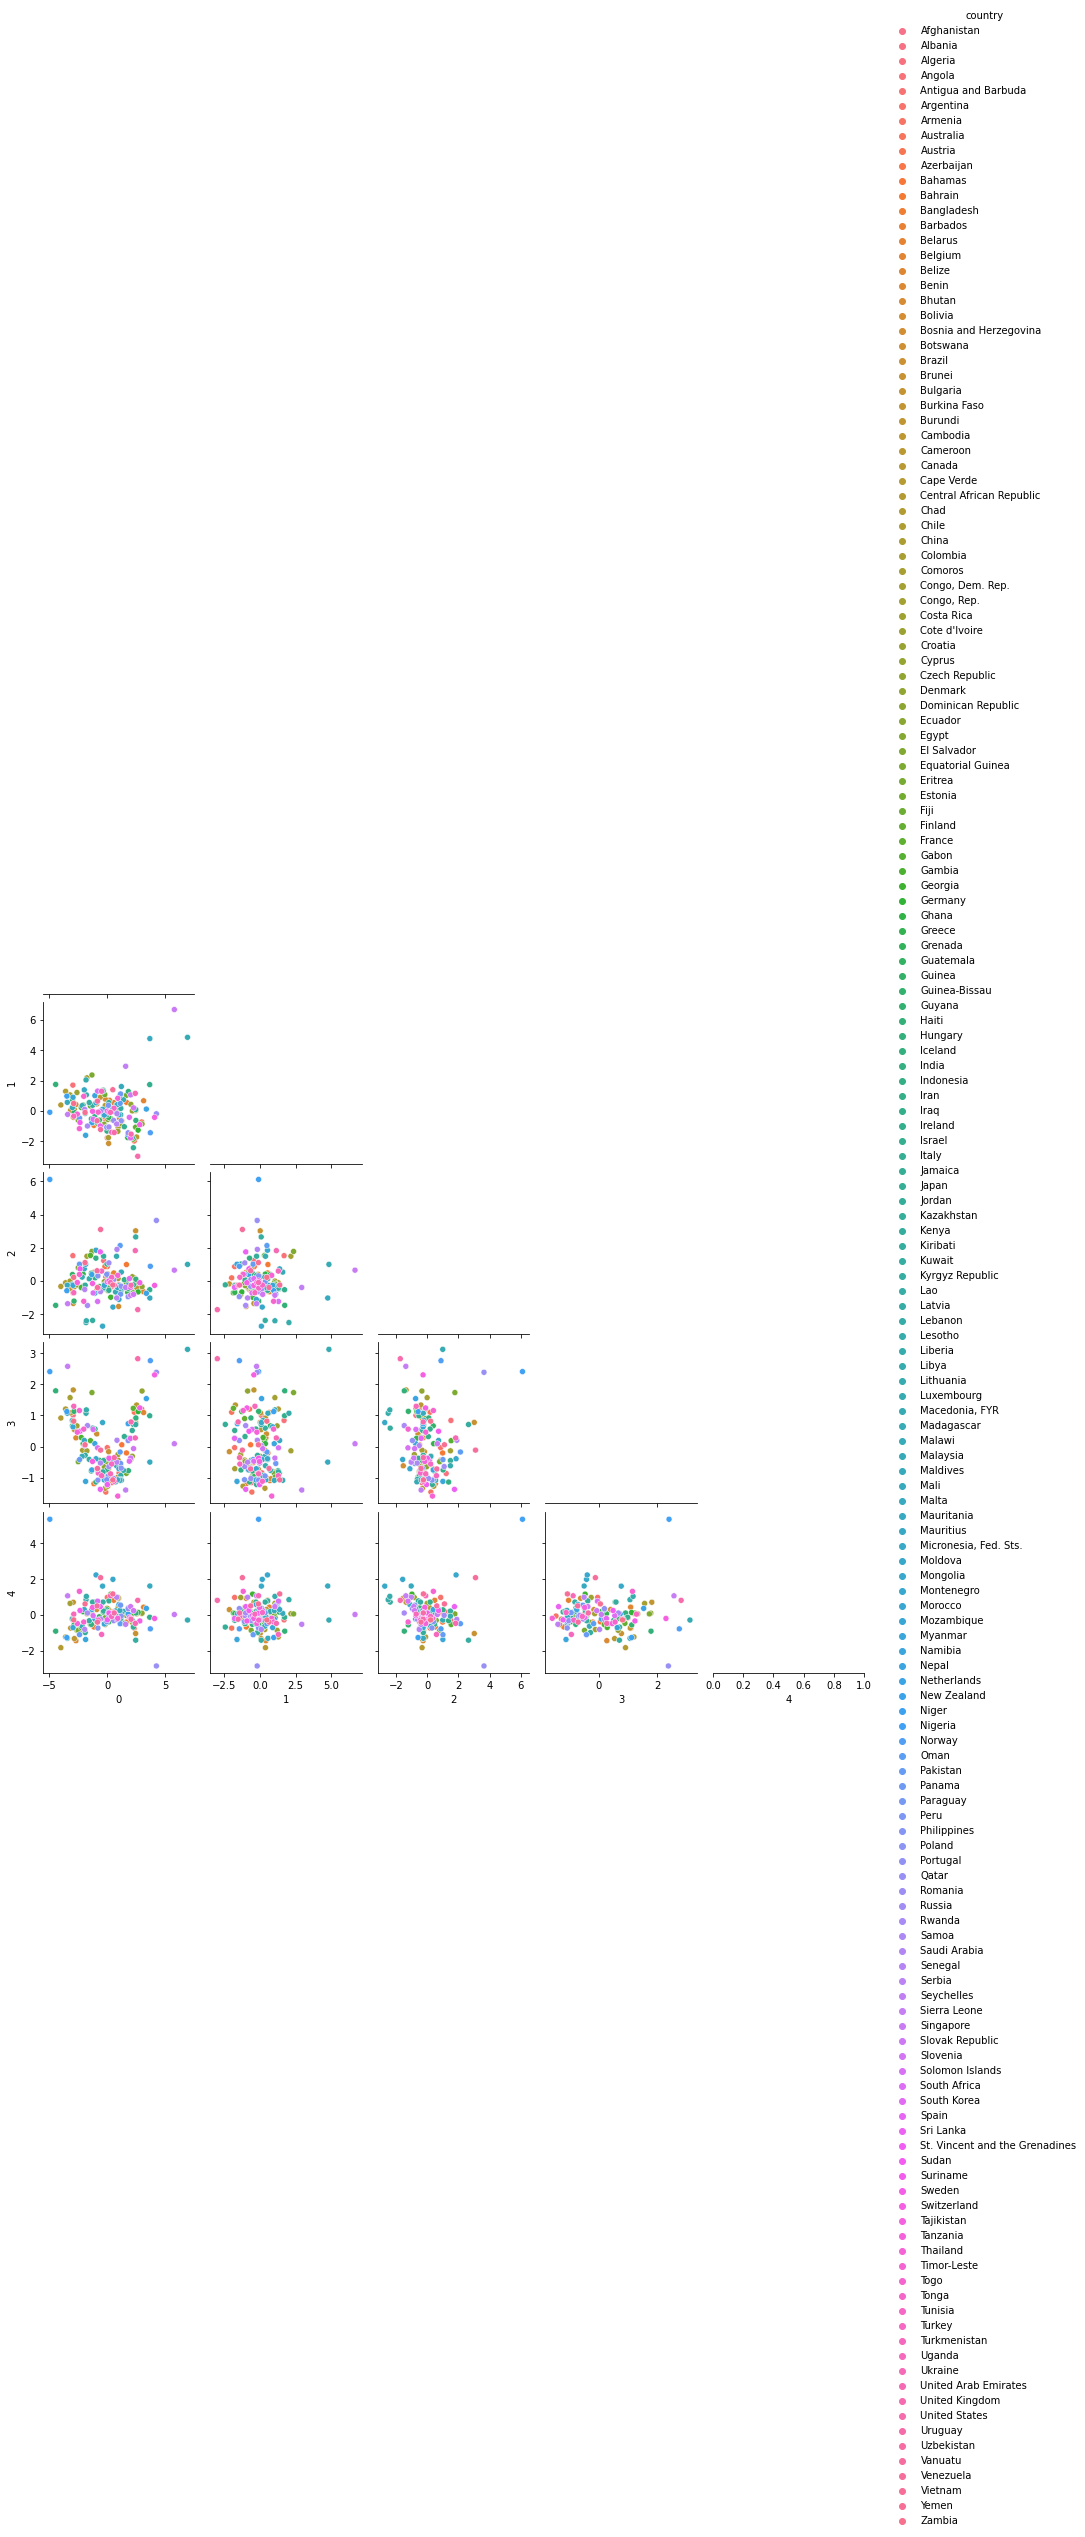

In [198]:
sns.pairplot(data=pca_df, hue='country', corner=True)
plt.show()

# Training

## K Means

### With PCA

In [423]:
distances_sum = []
sil_scores = []
K = range(2, 20)

for k in K:
  kmeans = KMeans(n_clusters=k)
  y_pred = kmeans.fit_predict(pca_df)
  distances_sum.append(kmeans.inertia_)
  sil_scores.append(silhouette_score(pca_df, y_pred))

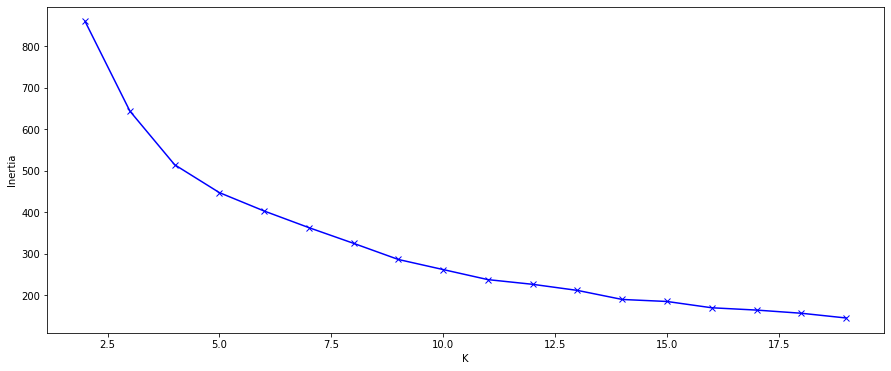

In [424]:
plt.figure(figsize=(15, 6))
plt.plot(K, distances_sum, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

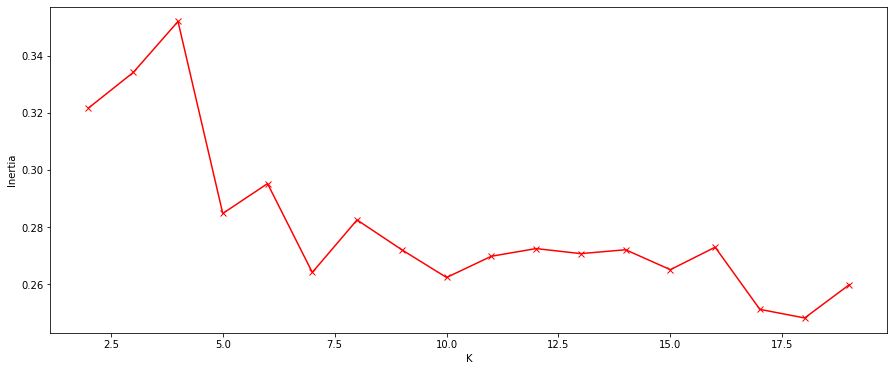

In [425]:
plt.figure(figsize=(15, 6))
plt.plot(K, sil_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

Then, the optimum number of clusters is 4.

In [202]:
pca_df

,0,1,2,3,4,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,Antigua and Barbuda
...,...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748,Vanuatu
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581,Venezuela
164,0.498524,1.390744,-0.238526,-1.074098,1.176081,Vietnam
165,-1.887451,-0.109453,1.109752,0.056257,0.618365,Yemen


In [426]:
kmeans = KMeans(n_clusters=4)
kmeans_pca = kmeans.fit_predict(pca_df)
print(f' The Silhouette score with PCA is: {silhouette_score(pca_df, kmeans_pca)}')

 The Silhouette score with PCA is: 0.35221708432935955


### Without PCA

In [235]:
distances_sum = []
sil_scores = []
K = range(2, 20)

for k in K:
  kmeans = KMeans(n_clusters=k)
  y_pred = kmeans.fit_predict(df_sc)
  distances_sum.append(kmeans.inertia_)
  sil_scores.append(silhouette_score(df_sc, y_pred))

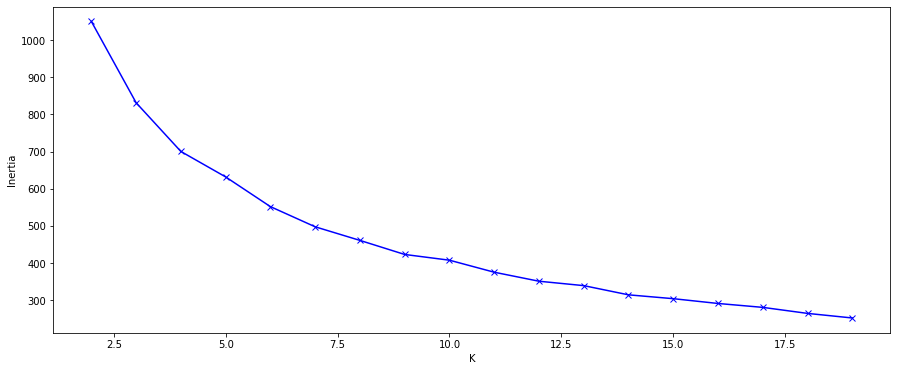

In [236]:
plt.figure(figsize=(15, 6))
plt.plot(K, distances_sum, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

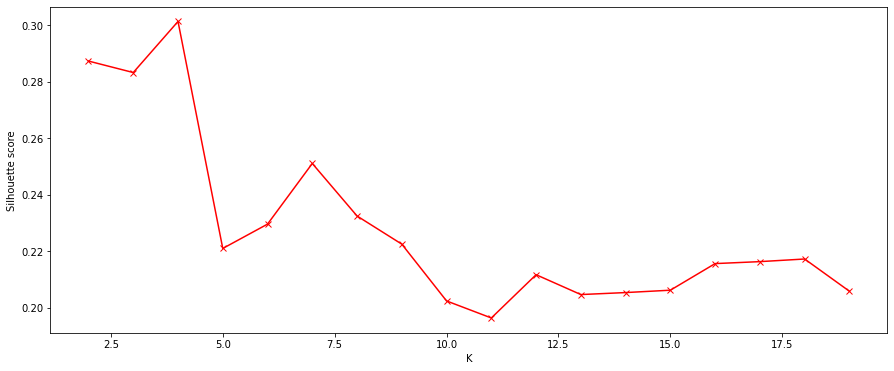

In [237]:
plt.figure(figsize=(15, 6))
plt.plot(K, sil_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.show()

Then, the optimum number of clusters is 5.

In [207]:
df_sc

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [427]:
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit_predict(df_sc)
print(f' The Silhouette score without PCA is: {silhouette_score(df_sc, kmeans)}')

 The Silhouette score without PCA is: 0.21868149174569426


We conclude that PCA improves the clustering.

## Hierarchical Clustering

### With PCA

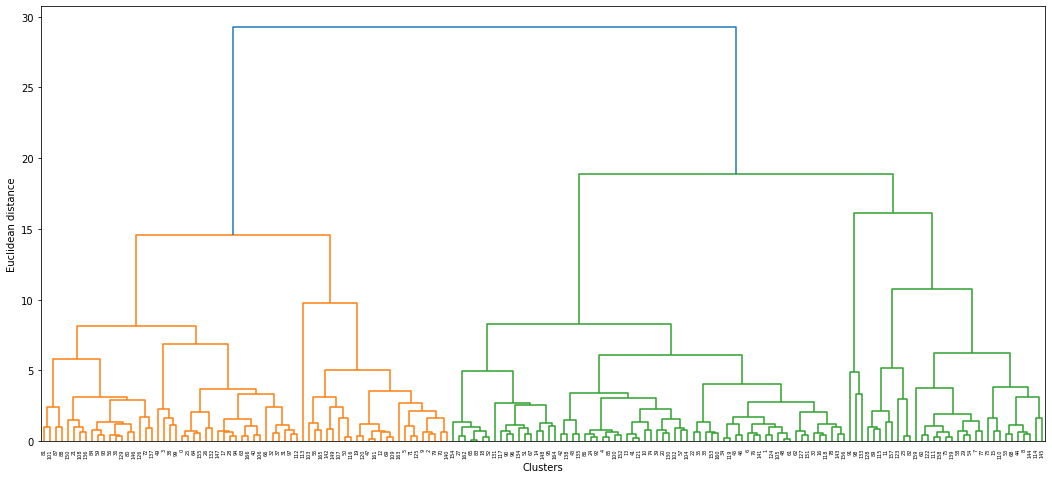

In [242]:
fig = plt.figure(figsize=(18, 8))
dedrogram_plot = dendrogram(linkage(pca_df, method='ward'))
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [249]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_df)

In [428]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_pca = hc.fit_predict(pca_df)

In [429]:
print(f' The Silhouette score with PCA is: {silhouette_score(pca_df, hc_pca)}')

 The Silhouette score with PCA is: 0.2700517226575089


### Without PCA

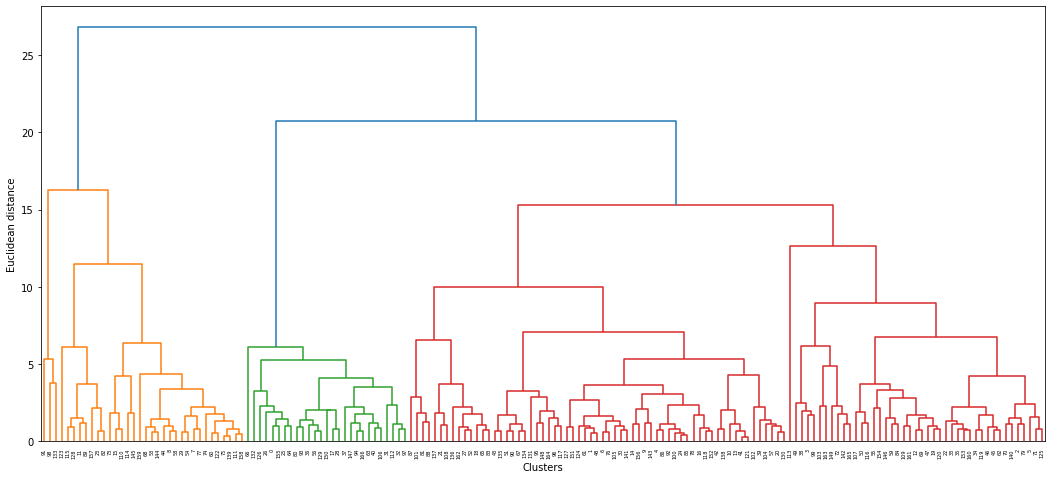

In [255]:
fig = plt.figure(figsize=(18, 8))
dedrogram_plot = dendrogram(linkage(df_sc, method='ward'))
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [430]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc = hc.fit_predict(df_sc)

In [431]:
print(f' The Silhouette score with PCA is: {silhouette_score(df_sc, hc)}')

 The Silhouette score with PCA is: 0.24563001303300652


Then, PCA improves the algorithm's performance.

## DBSCAN

### With PCA

In [276]:
pca_df.head()

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


In [371]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_df)
distances, indices = neighbors_fit.kneighbors(pca_df)

In [372]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

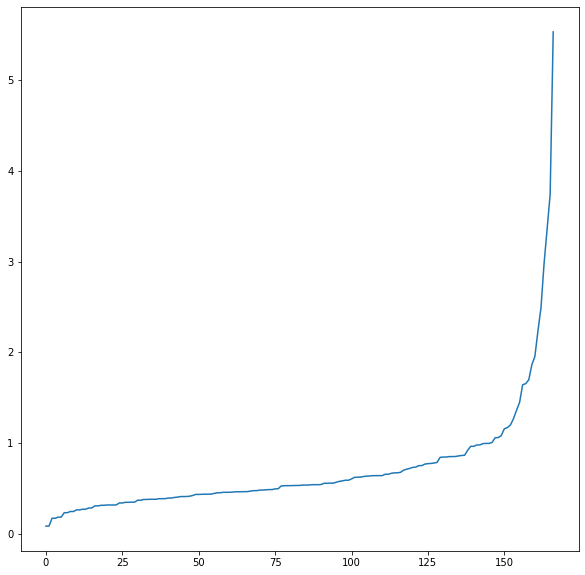

In [373]:
plt.figure(figsize=(10, 10))
plt.plot(distances)
plt.show()

In [374]:
eps_values = np.arange(0.5, 1.5, 0.05)
min_samples = range(3, 18)

In [375]:
dbscan_params = list(product(eps_values, min_samples))

In [407]:
sil_scores = []
no_of_clusters = []


for param in dbscan_params:
  eps = param[0]
  min = param[1]
  dbscan = DBSCAN(eps=eps, min_samples=min)
  y_pred = dbscan.fit_predict(pca_df)
  if np.unique(y_pred).size == 1:
    sil_scores.append(-1)
    continue
  sil_scores.append(silhouette_score(pca_df, y_pred, metric='euclidean'))
  no_of_clusters.append(len(np.unique(y_pred)))

In [408]:
records = pd.DataFrame(dbscan_params, columns=['Eps', 'Min'])
records['sil score'] = sil_scores
records['n_clusters'] = no_of_clusters

In [409]:
pivot_df = pd.pivot_table(data=records, values='sil score', columns='Eps', index='Min')
pivot_df.head(3)

Eps,1.50,1.55,1.60,1.65,1.70,1.75,1.80,1.85,1.90,1.95,2.00,2.05,2.10,2.15,2.20,2.25,2.30,2.35,2.40,2.45
Min,,,,,,,,,,,,,,,,,,,,
3,0.466650,0.466650,0.466650,0.473523,0.501720,0.501720,0.50172,0.50172,0.528639,0.528639,0.555979,0.555979,0.555979,0.555979,0.555979,0.580162,0.580162,0.580162,0.580162,0.580162
4,0.446651,0.446651,0.456327,0.461264,0.485375,0.501720,0.50172,0.50172,0.528639,0.528639,0.555979,0.555979,0.555979,0.555979,0.555979,0.580162,0.580162,0.580162,0.580162,0.580162
5,0.414150,0.418132,0.418132,0.419486,0.454578,0.481302,0.50172,0.50172,0.528639,0.528639,0.555979,0.555979,0.555979,0.555979,0.555979,0.580162,0.580162,0.580162,0.580162,0.580162


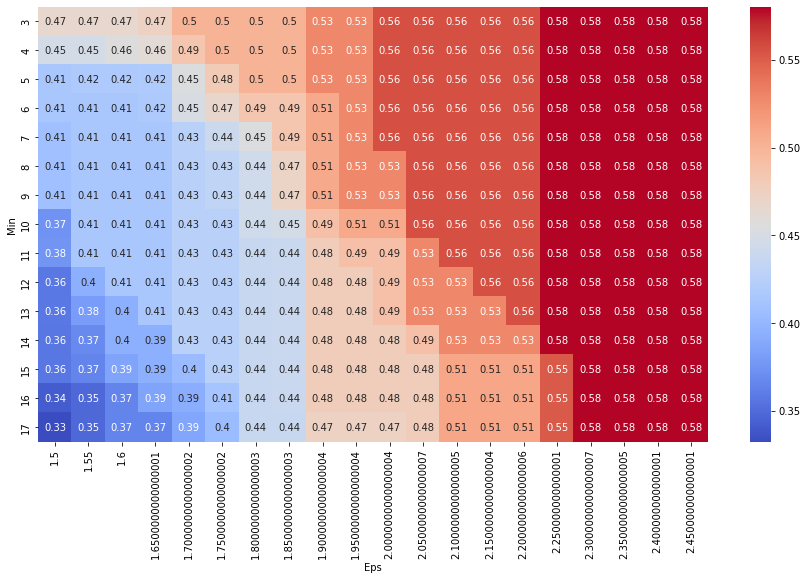

In [410]:
plt.figure(figsize=(15 ,8))
sns.heatmap(data=pivot_df, annot=True, cmap='coolwarm')
plt.show()

In [411]:
pivot_2 = pd.pivot_table(records, values='n_clusters', columns='Eps', index='Min')

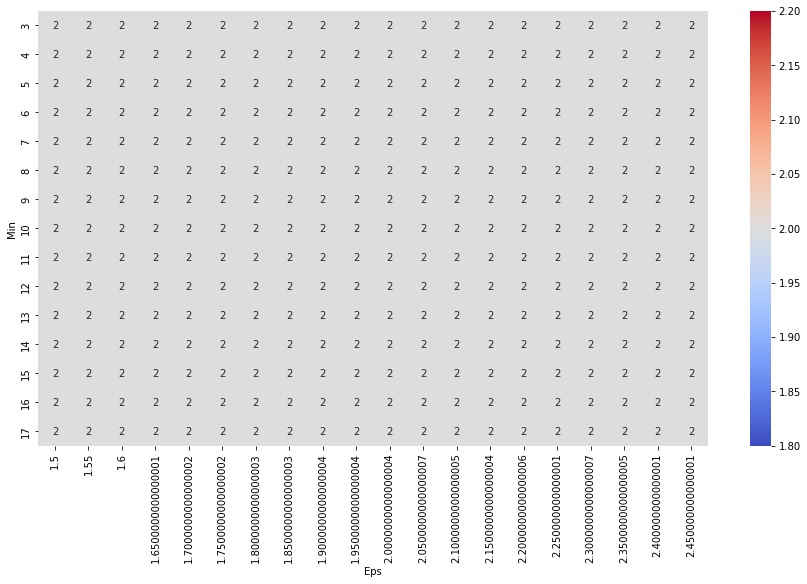

In [412]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

We chose `eps=1.45` and `min_samples=8`.

In [434]:
dbscan = DBSCAN(eps=1.3, min_samples=6)
dbscan_pca = dbscan.fit_predict(pca_df)

In [435]:
print(f' The Silhouette score with PCA is: {silhouette_score(pca_df, dbscan_pca)}')

 The Silhouette score with PCA is: 0.37093233404537995


### Without PCA

In [382]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_sc)
distances, indices = neighbors_fit.kneighbors(df_sc)

In [383]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

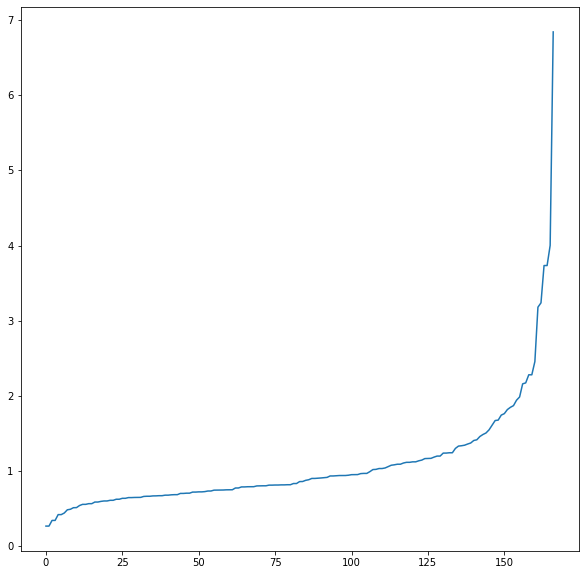

In [384]:
plt.figure(figsize=(10, 10))
plt.plot(distances)
plt.show()

In [385]:
eps_values = np.arange(1.5, 2.5, 0.05)
min_samples = range(3, 18)

In [386]:
dbscan_params = list(product(eps_values, min_samples))

In [395]:
sil_scores = []
no_of_clusters = []

for param in dbscan_params:
  eps = param[0]
  min = param[1]
  dbscan = DBSCAN(eps=eps, min_samples=min)
  y_pred = dbscan.fit_predict(df_sc)
  if np.unique(y_pred).size == 1:
    sil_scores.append(-1)
    continue
  sil_scores.append(silhouette_score(df_sc, y_pred, metric='euclidean'))
  no_of_clusters.append(len(np.unique(y_pred)))

In [397]:
records = pd.DataFrame(dbscan_params, columns=['Eps', 'Min'])
records['sil score'] = sil_scores
records['n_clusters'] = no_of_clusters

In [398]:
pivot_df = pd.pivot_table(data=records, values='sil score', columns='Eps', index='Min')
pivot_df.head(3)

Eps,1.50,1.55,1.60,1.65,1.70,1.75,1.80,1.85,1.90,1.95,2.00,2.05,2.10,2.15,2.20,2.25,2.30,2.35,2.40,2.45
Min,,,,,,,,,,,,,,,,,,,,
3,0.154047,0.152265,0.154793,0.153468,0.156355,0.157702,0.160755,0.161005,0.161330,0.162008,0.453084,0.453084,0.453084,0.453084,0.485665,0.485665,0.485665,0.485665,0.536493,0.536493
4,0.289890,0.291942,0.303425,0.304900,0.331739,0.343869,0.361639,0.370739,0.382615,0.392161,0.441945,0.453084,0.453084,0.453084,0.485665,0.485665,0.485665,0.485665,0.511507,0.536493
5,0.288296,0.290404,0.291942,0.304900,0.319878,0.343869,0.356776,0.365482,0.366058,0.384775,0.403244,0.420542,0.436756,0.453084,0.469274,0.469274,0.485665,0.485665,0.511507,0.511507


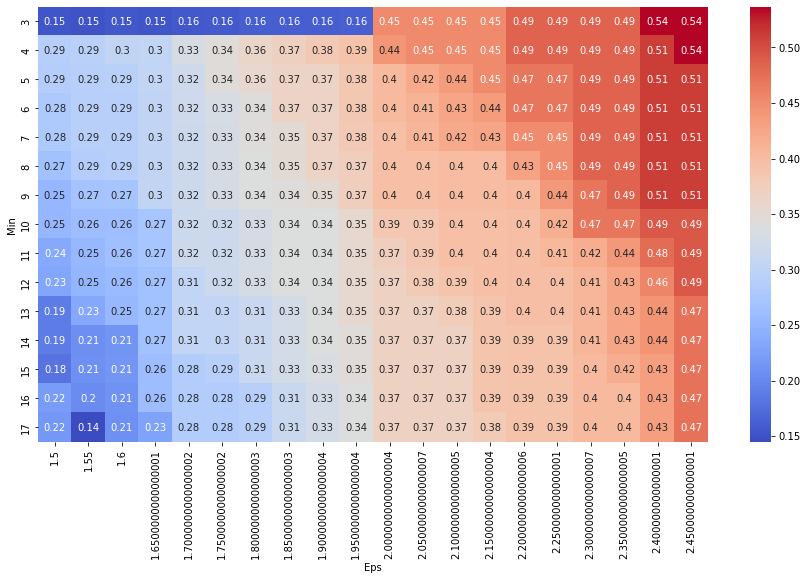

In [400]:
plt.figure(figsize=(15 ,8))
sns.heatmap(data=pivot_df, annot=True, cmap='coolwarm')
plt.show()

In [402]:
pivot_2 = pd.pivot_table(records, values='n_clusters', columns='Eps', index='Min')

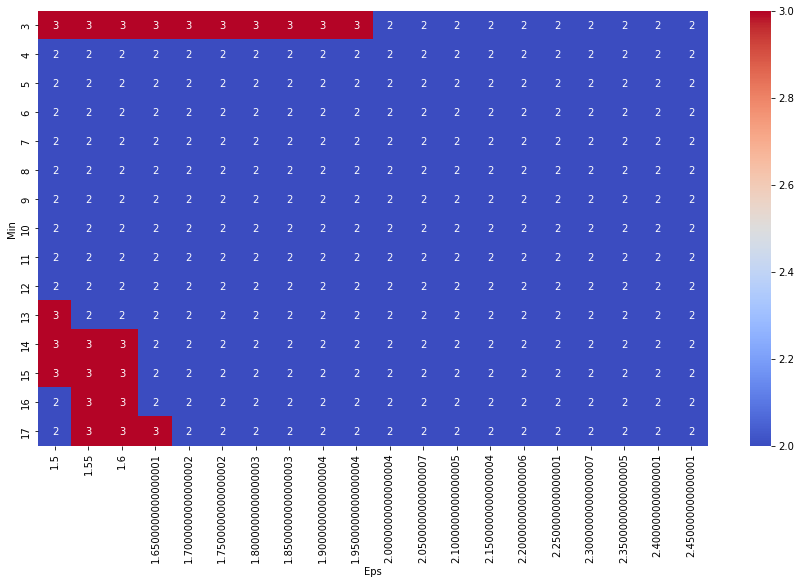

In [404]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

We chose `eps=2.0` and `min_samples=3`.

In [436]:
dbscan = DBSCAN(eps=2.0, min_samples=3)
dbscan = dbscan.fit_predict(pca_df)

In [437]:
print(f' The Silhouette score without PCA is: {silhouette_score(pca_df, dbscan)}')

 The Silhouette score without PCA is: 0.5559794381317746


We conclude that DBSCAN works better without PCA.

# Testing

In [438]:
df['k means pca'] = kmeans_pca
df['k means'] = kmeans

df['hc pca'] = hc_pca
df['hc'] = hc

df['dbscan pca'] = dbscan_pca
df['dbscan'] = dbscan


In [439]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k means pca,k means,hc pca,hc,dbscan pca,dbscan
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,3,1,2,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,4,2,1,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,1,1,1,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,3,1,1,-1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,4,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2,1,2,1,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2,1,1,1,-1,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2,4,2,1,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,1,1,1,0,0


In [440]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k means pca',
       'k means', 'hc pca', 'hc', 'dbscan pca', 'dbscan'],
      dtype='object')

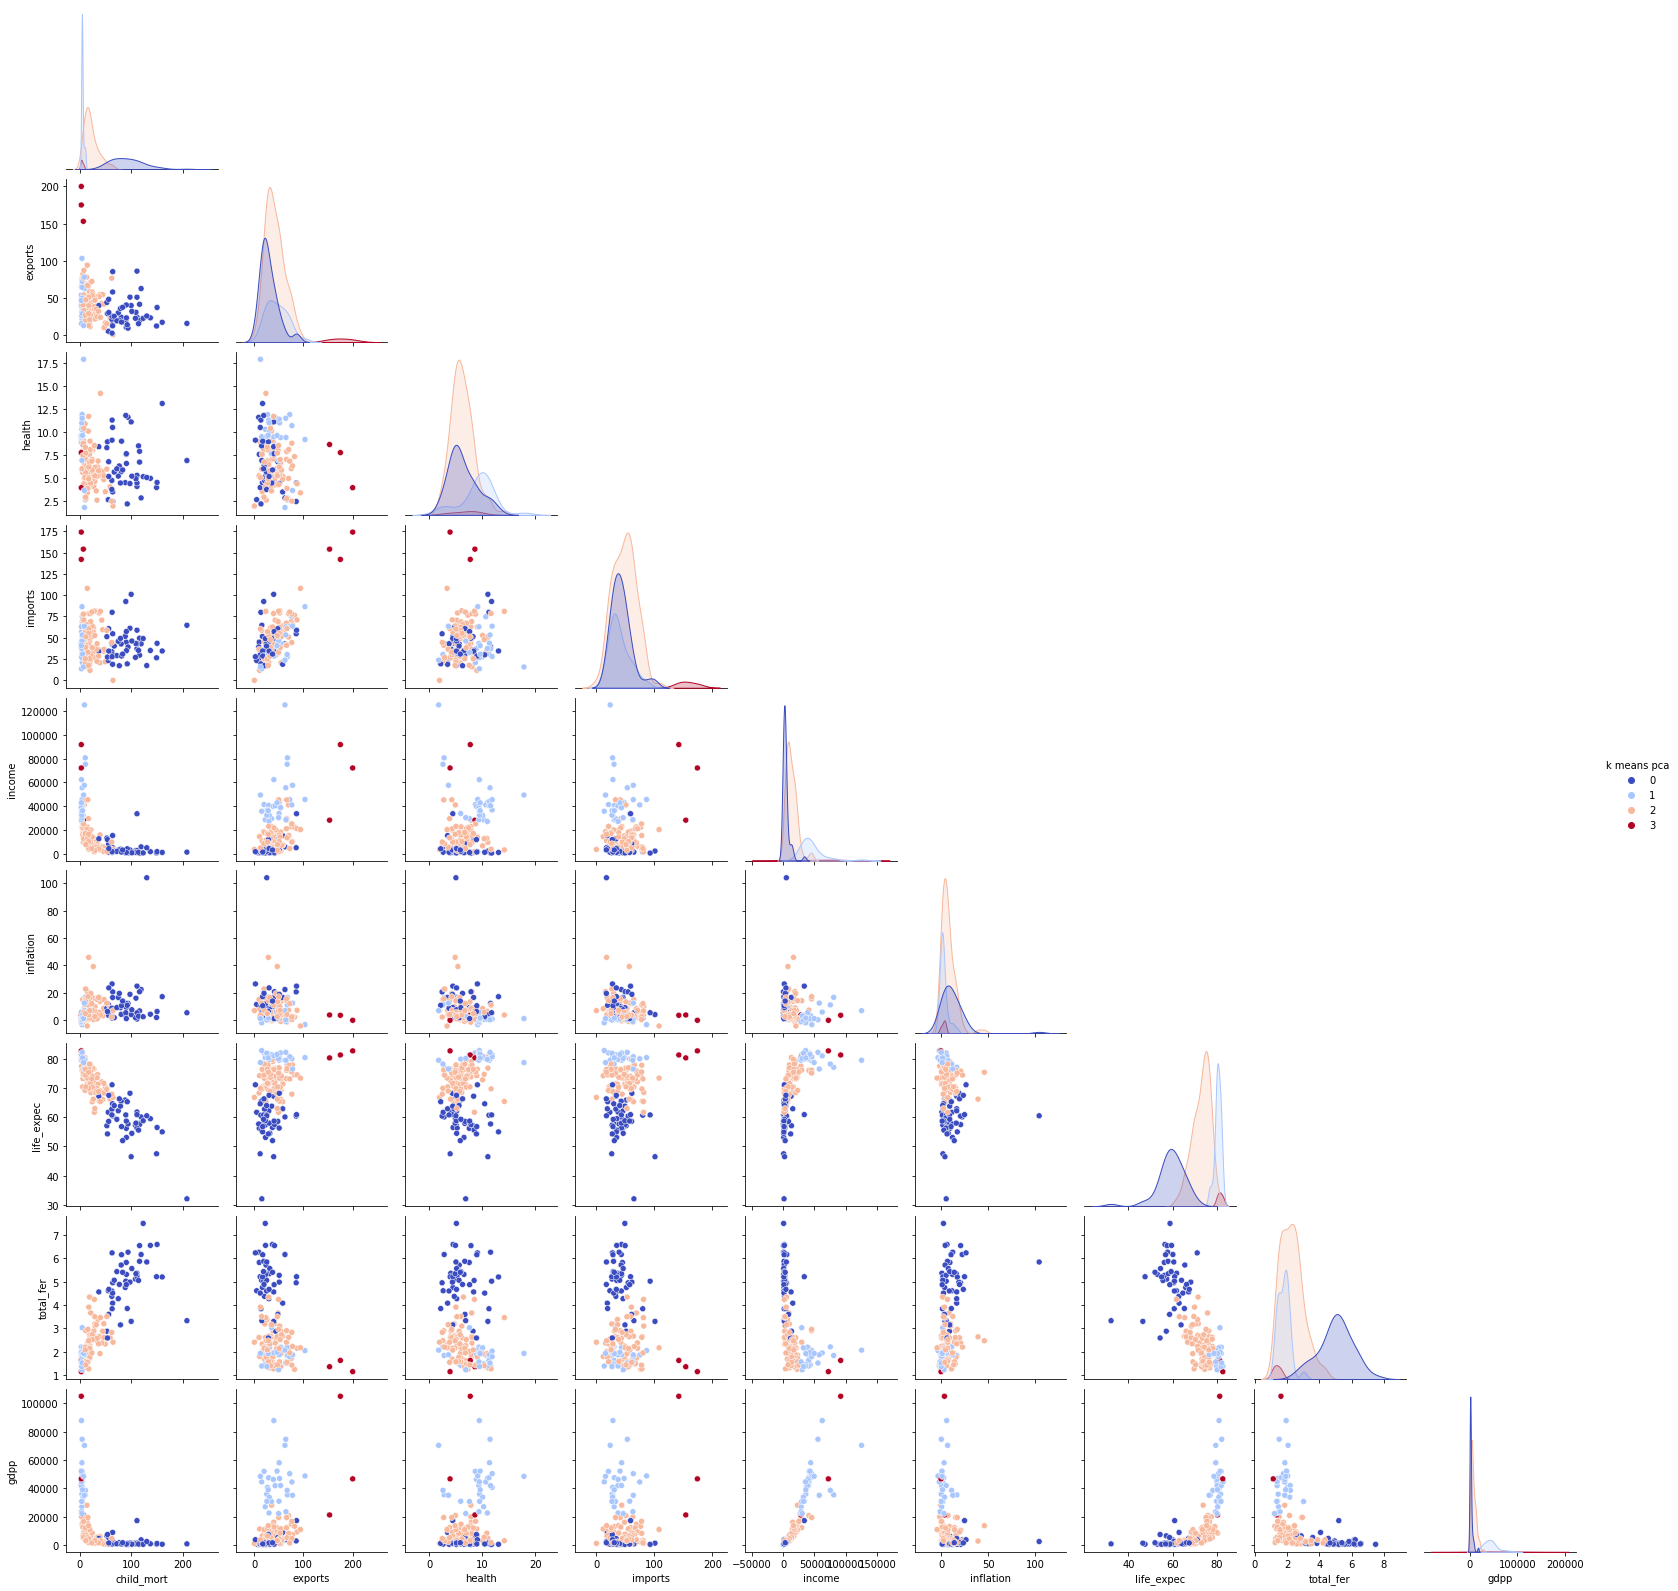

In [449]:
sns.pairplot(data=df[['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k means pca']], palette='coolwarm', hue='k means pca', corner=True)
plt.show()

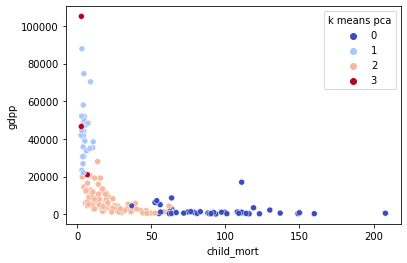

In [451]:
sns.scatterplot(data=df, x='child_mort', y='gdpp', hue='k means pca', palette='coolwarm')
plt.show()

In [456]:
df[df['k means pca']==0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     